In [7]:
!pip install np_utils
!pip install tensorflow

`np_utils` é um módulo do Keras, uma biblioteca de aprendizado de máquina de alto nível construída em cima do TensorFlow. Ele fornece funções auxiliares para trabalhar com matrizes NumPy, particularmente para tarefas relacionadas a dados categóricos.

In [5]:
import tensorflow as tf
from keras.src.legacy.preprocessing.image import ImageDataGenerator
from keras.models import Model, Sequential
import np_utils
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Reshape, Dropout
import pandas as pd
import numpy as np
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt

1. import tensorflow as tf
TensorFlow: É a biblioteca fundamental de aprendizado de máquina (ML) e deep learning (DL) que está sendo utilizada. Ela fornece um ecossistema poderoso para construir, treinar e implantar modelos de ML.
import tensorflow as tf: Essa linha importa a biblioteca TensorFlow e a renomeia como tf para facilitar o uso em seu código.
2. from keras.src.legacy.preprocessing.image import ImageDataGenerator
Keras: É uma biblioteca de aprendizado de máquina de alto nível construída em cima do TensorFlow. Ela torna mais fácil construir e treinar modelos de DL, fornecendo uma API intuitiva.
ImageDataGenerator: Essa classe é crucial para o pré-processamento de imagens. Ela permite que você aumente os seus dados de treinamento de forma eficiente, gerando novas imagens (e suas labels) a partir das existentes. Isso inclui operações como rotação, espelhamento, deslocamento, mudança de brilho, etc. Isso ajuda a evitar o overfitting e melhora a generalização do seu modelo.
3. from keras.models import Model, Sequential
Model: Classe base para a construção de modelos de aprendizado de máquina no Keras. Você pode usá-la para criar modelos complexos com múltiplas entradas e saídas.
Sequential: Uma subclasse de Model que é usada para criar modelos sequenciais. Os modelos sequenciais são simplesmente pilhas de camadas, onde a saída de uma camada serve como entrada para a próxima.
4. import np_utils
np_utils: Este módulo (que já fazia parte do Keras 1 e 2) fornece funções para trabalhar com dados categóricos NumPy, como conversão de rótulos de classe em matrizes binárias (one-hot encoding).
5. from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Reshape, Dropout
Dense: Camada de rede neural densa, onde cada neurônio está conectado a todos os neurônios da camada anterior.
Conv2D: Camada de convolução 2D, que é uma das principais unidades para o processamento de imagens. Aplica filtros (kernels) às imagens para extrair características como bordas, padrões e texturas.
MaxPooling2D: Camada de pooling que reduz o tamanho das imagens, preservando as características mais importantes. Ela faz isso selecionando o valor máximo dentro de uma região.
Flatten: Camada que transforma a saída de uma camada de convolução (uma matriz) em um vetor unidimensional, preparando-o para ser alimentado em uma camada densa.
Reshape: Camada que permite que você redimensione a forma de um tensor. É útil para combinar diferentes camadas ou preparar os dados para uma próxima operação.
Dropout: Camada de regularização que desativa aleatoriamente alguns neurônios durante o treinamento. Isso ajuda a evitar overfitting, pois impede que o modelo se torne muito dependente de alguns neurônios específicos.
6. import pandas as pd
Pandas: Uma biblioteca essencial para o processamento e análise de dados. Ele fornece estruturas de dados como DataFrame que são ideais para armazenar e manipular dados tabulares.
7. import numpy as np
NumPy: Biblioteca fundamental para operações matemáticas e científicas em Python. Ela fornece arrays multidimensionais, funções matemáticas e ferramentas para trabalhar com dados numéricos.
8. from keras.optimizers import RMSprop
RMSprop: Um algoritmo de otimização usado para treinar modelos de DL. Ele é usado para ajustar os pesos do modelo durante o treinamento e tentar encontrar os valores que minimizam a função de perda.
9. import matplotlib.pyplot as plt
Matplotlib: Uma biblioteca de plotagem em Python. Permite que você crie gráficos e visualizações de dados de forma eficiente.

In [7]:
TRAIN_IMG = r'C:\Users\paula\OneDrive\Documentos\Programação\Avanti Bootcamp\Machine Learning\Atividade04\train'
TEST_IMG = r'C:\Users\paula\OneDrive\Documentos\Programação\Avanti Bootcamp\Machine Learning\Atividade04\test'
N_CLASS = 2
BATCH = 32
ROWS = 224
COLS = 224
SHAPE = (ROWS, COLS, 3)
EPOCHS = 15
TRAIN_SAMPLES = 3000
TEST_SAMPLES = 3000

In [8]:
train_gen = ImageDataGenerator(rescale=1/.512).flow_from_directory(directory=TRAIN_IMG,
                                                                 class_mode='categorical',
                                                                 batch_size=BATCH,
                                                                 target_size=(ROWS, COLS),
                                                                 color_mode='rgb',
                                                                 shuffle=True)
test_gen = ImageDataGenerator(rescale=1/.512).flow_from_directory(directory=TEST_IMG,
                                                                 class_mode='categorical',
                                                                 batch_size=BATCH,
                                                                 target_size=(ROWS, COLS),
                                                                 color_mode='rgb',
                                                                 shuffle=False)

Found 11879 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


Este código cria dois geradores de dados de imagem: train_gen para o conjunto de treinamento e test_gen para o conjunto de teste:
1. ImageDataGenerator:
Essa classe é uma ferramenta poderosa para pré-processamento e aumento de dados de imagens no Keras.
Ela permite que você aplique transformações aleatórias às suas imagens durante o treinamento, o que ajuda a evitar o overfitting e melhorar a generalização do modelo.
2. rescale=1/.512:
Essa configuração especifica que as imagens devem ser redimensionadas dividindo seus valores de pixel por 0.512. Essa reescala é uma prática comum para normalizar os dados e melhorar o desempenho do treinamento.
3. flow_from_directory(directory=TRAIN_IMG, ...) e flow_from_directory(directory=TEST_IMG, ...):
flow_from_directory: Essa função do ImageDataGenerator é crucial. Ela lê imagens de um diretório e as transforma em batches para o treinamento ou teste.
directory=TRAIN_IMG e directory=TEST_IMG: Especificam os caminhos para os diretórios que contêm as imagens de treinamento e teste, respectivamente.
class_mode='categorical': Indica que as labels devem ser representadas em formato categórico (one-hot encoding). Isso é necessário para a maioria dos modelos de classificação.
batch_size=BATCH: Define o tamanho de cada batch de imagens que será processado.
target_size=(ROWS, COLS): Define o tamanho das imagens que serão utilizadas no treinamento/teste (largura e altura).
color_mode='rgb': Especifica que as imagens são coloridas (RGB).
shuffle=True (para train_gen) e shuffle=False (para test_gen): Define se as imagens devem ser embaralhadas durante o treinamento (para evitar que o modelo aprenda padrões específicos da ordem das imagens) e não embaralhadas durante o teste (para manter a ordem original das imagens).
Em resumo, este código cria dois geradores de dados que leem imagens de seus diretórios correspondentes, as pré-processam (reescalam) e as transformam em batches de dados para o treinamento e teste do modelo.

In [4]:
from keras.optimizers import Adam

def CNN(layers = 3, filters = 32, filters_size = (3, 3), init = 'glorot_uniform', active_func = 'relu',do=0.2, opt='RMSprop'):
    
    model = Sequential()
    for i in range(0, layers):
        model.add(Conv2D(filters, filters_size, activation=active_func, input_shape=SHAPE))
        model.add(MaxPooling2D(2, 2))
#         model.add(Dropout(do))
    
    model.add(Flatten())
    model.add(Dense(512, activation=active_func))
    model.add(Dense(N_CLASS, activation='softmax'))
    
    model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])
    model.summary()
    
    return model

Este código define uma função que cria uma rede neural convolucional (CNN) usando Keras, uma biblioteca popular para criar e treinar modelos de deep learning em Python:
1. Importação das bibliotecas necessárias
2. Definição da função CNN
layers: Número de camadas convolucionais.
filters: Número de filtros em cada camada convolucional.
filters_size: Tamanho dos filtros (kernels).
init: Inicializador de pesos (não usado explicitamente na função).
active_func: Função de ativação a ser usada nas camadas convolucionais.
do: Taxa de dropout (comentado no código).
opt: Otimizador (não usado explicitamente na função).
3. Criação do modelo
4. Adição de camadas convolucionais e de pooling
Conv2D: Adiciona uma camada convolucional com o número de filtros e tamanho especificado.
MaxPooling2D: Adiciona uma camada de max pooling com tamanho de pool de 2x2.
Dropout: Comentado, mas serve para regularização, prevenindo overfitting.
5. Flatten e camadas densas
Flatten: Achata a saída da camada convolucional para uma dimensão.
Dense: Adiciona camadas totalmente conectadas (dense layers). A primeira tem 512 neurônios, e a última tem N_CLASS neurônios com ativação softmax para classificação.
6. Compilação do modelo
optimizer: Adam com taxa de aprendizado de 0.0001.
loss: Função de perda 'categorical_crossentropy' para problemas de classificação.
metrics: Métrica de avaliação 'accuracy'
7. Resumo do modelo
8. Retorno do modelo

In [9]:
import itertools

def Evaluate(confusion, class_names, normalize=True, title="Evaluation", cmap=plt.cm.Blues):
    plt.figure(figsize=(8,8))
    plt.imshow(confusion, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    
    tm = np.arange(len(class_names))
    plt.xticks(tm, class_names, rotation=45)
    plt.yticks(tm, class_names)
    
    if normalize:
        confusion = confusion.astype('float')/confusion.sum(axis=1)[:, np.newaxis]
        confusion = np.around(confusion, decimals=2)
        confusion[np.isnan(confusion)] = 0.0
        print("normal ConfMatrix")
    else:
        print("no normal ConfMatrix")
    
    thresh = confusion.max()/2
    for i, j in itertools.product(range(confusion.shape[0]), range(confusion.shape[1])):
        plt.text(j, i, confusion[i, j],
                horizontalalignment='center',
                color='white' if confusion[i, j] > thresh else 'black'
                )
    
    plt.tight_layout()
    plt.ylabel('true label')
    plt.xlabel('predicted label')
    plt.show()
    
    

1. import itertools:
Importa o módulo itertools que fornece funções para iterar sobre sequências de maneira eficiente.
2. def Evaluate(confusion, class_names, normalize=True, title="Evaluation", cmap=plt.cm.Blues)::
Define a função Evaluate, que recebe os seguintes argumentos:
confusion: Uma matriz de confusão NumPy que contém os valores de contagem das previsões corretas e incorretas para cada classe.
class_names: Uma lista de strings que representa os nomes das classes.
normalize: Um booleano (padrão é True) que indica se a matriz de confusão deve ser normalizada (dividida pela soma de cada linha) para mostrar a proporção de previsões corretas para cada classe.
title: Um título para o gráfico (padrão é "Evaluation").
cmap: Uma paleta de cores para o gráfico (padrão é plt.cm.Blues).
3. plt.figure(figsize=(8,8)):
Cria uma nova figura matplotlib com tamanho de 8x8 polegadas.
4. plt.imshow(confusion, interpolation='nearest', cmap=cmap):
Cria uma imagem da matriz de confusão usando a função imshow do matplotlib.
interpolation='nearest': Define a interpolação para o método mais próximo, o que é adequado para matrizes de confusão discretas.
cmap: Especifica a paleta de cores.
5. plt.title(title):
Define o título do gráfico.
6. plt.colorbar():
Adiciona uma barra de cores para o gráfico.
7. tm = np.arange(len(class_names)):
Cria uma matriz NumPy com o mesmo tamanho que o número de classes. Essa matriz será usada para definir as posições dos rótulos dos eixos.
8. plt.xticks(tm, class_names, rotation=45) e plt.yticks(tm, class_names):
Define os rótulos dos eixos x e y com os nomes das classes.
rotation=45: Rotaciona os rótulos do eixo x em 45 graus para evitar sobreposição.
9. if normalize::
Se o parâmetro normalize for True, a matriz de confusão será normalizada dividindo cada linha pela soma da linha. Isso é feito para mostrar a proporção de previsões corretas para cada classe.
10. thresh = confusion.max()/2:
Define um limite para o texto na matriz de confusão.
11. for i, j in itertools.product(range(confusion.shape[0]), range(confusion.shape[1]))::
Itera sobre todas as células na matriz de confusão usando a função itertools.product.
12. plt.text(j, i, confusion[i, j], horizontalalignment='center', color='white' if confusion[i, j] > thresh else 'black'):
Adiciona o texto com o valor da célula na posição correspondente na matriz de confusão. A cor do texto é definida como branca se o valor da célula for maior que o limite, caso contrário, é definido como preto.
13. plt.tight_layout():
Ajusta o layout do gráfico para evitar sobreposição.
14. plt.ylabel('true label') e plt.xlabel('predicted label'):
Define os rótulos dos eixos y e x.
15. plt.show():
Exibe o gráfico.

In [10]:
def plot_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    if 'val_accuracy' in history.history:
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='upper left')
    
    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    if 'val_loss' in history.history:
        plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper left')
    
    plt.tight_layout()
    plt.show()

Este código define uma função chamada Evaluate que gera uma matriz de confusão visualmente atrativa, uma ferramenta muito útil para avaliar o desempenho de modelos de classificação:
1. import matplotlib.pyplot as plt:
Importa a biblioteca matplotlib.pyplot como plt, que é usada para criar gráficos e visualizações.
2. import itertools:
Importa o módulo itertools que fornece funções para iterar sobre sequências de maneira eficiente.
3. def Evaluate(confusion, class_names, normalize=True, title="Evaluation", cmap=plt.cm.Blues)::
Define a função Evaluate, que recebe os seguintes argumentos:
confusion: Uma matriz de confusão NumPy que contém os valores de contagem das previsões corretas e incorretas para cada classe.
class_names: Uma lista de strings que representa os nomes das classes.
normalize: Um booleano (padrão é True) que indica se a matriz de confusão deve ser normalizada (dividida pela soma de cada linha) para mostrar a proporção de previsões corretas para cada classe.
title: Um título para o gráfico (padrão é "Evaluation").
cmap: Uma paleta de cores para o gráfico (padrão é plt.cm.Blues).
4. plt.figure(figsize=(8,8)):
Cria uma nova figura matplotlib com tamanho de 8x8 polegadas.
5. plt.imshow(confusion, interpolation='nearest', cmap=cmap):
Cria uma imagem da matriz de confusão usando a função imshow do matplotlib.
interpolation='nearest': Define a interpolação para o método mais próximo, o que é adequado para matrizes de confusão discretas.
cmap: Especifica a paleta de cores.
6. plt.title(title):
Define o título do gráfico.
7. plt.colorbar():
Adiciona uma barra de cores para o gráfico.
8. tm = np.arange(len(class_names)):
Cria uma matriz NumPy com o mesmo tamanho que o número de classes. Essa matriz será usada para definir as posições dos rótulos dos eixos.
9. plt.xticks(tm, class_names, rotation=45) e plt.yticks(tm, class_names):
Define os rótulos dos eixos x e y com os nomes das classes.
rotation=45: Rotaciona os rótulos do eixo x em 45 graus para evitar sobreposição.
10. if normalize::
Se o parâmetro normalize for True, a matriz de confusão será normalizada dividindo cada linha pela soma da linha. Isso é feito para mostrar a proporção de previsões corretas para cada classe.
11. thresh = confusion.max()/2:
Define um limite para o texto na matriz de confusão.
12. for i, j in itertools.product(range(confusion.shape[0]), range(confusion.shape[1]))::
Itera sobre todas as células na matriz de confusão usando a função itertools.product.
13. plt.text(j, i, confusion[i, j], horizontalalignment='center', color='white' if confusion[i, j] > thresh else 'black'):
Adiciona o texto com o valor da célula na posição correspondente na matriz de confusão. A cor do texto é definida como branca se o valor da célula for maior que o limite, caso contrário, é definido como preto.
14. plt.tight_layout():
Ajusta o layout do gráfico para evitar sobreposição.
15. plt.ylabel('true label') e plt.xlabel('predicted label'):
Define os rótulos dos eixos y e x.
16. plt.show():
Exibe o gráfico.

In [11]:
from sklearn.metrics import confusion_matrix, classification_report
from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error

def trainAndEval(model, epoch):
    # early_stopping = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)
    history = model.fit(train_gen, epochs=epoch, steps_per_epoch=30, validation_data = test_gen)
    
    loss_and_metrics = model.evaluate(test_gen, steps=20)
    print("Loss: ", loss_and_metrics[0])
    print("Accuracy: ", loss_and_metrics[1])
    test_gen.reset()
    
    Y_pred = model.predict(test_gen, steps=TEST_SAMPLES // BATCH + 1)
    y_pred = np.argmax(Y_pred, axis=1)
    
    class_names = []
    for key in train_gen.class_indices:
        class_names.append(key)
        
    cr = classification_report(test_gen.classes, y_pred, target_names=class_names)
    print("Class Report\n" + cr)
    confusion = confusion_matrix(test_gen.classes, y_pred)

    Evaluate(confusion, class_names, normalize=True, title='Evaluation')
    Evaluate(confusion, class_names, normalize=False, title='Evaluation')
    
    plot_history(history)
    
    return model

Este código define uma função chamada trainAndEval que treina um modelo de aprendizado de máquina e, em seguida, avalia seu desempenho usando várias métricas:
1. from sklearn.metrics import confusion_matrix, classification_report:
Importa funções do módulo sklearn.metrics para calcular a matriz de confusão e o relatório de classificação.
2. from keras.callbacks import EarlyStopping:
Importa a classe EarlyStopping do Keras, que pode ser usada para interromper o treinamento precocemente se o desempenho do modelo não melhorar após um determinado número de épocas.
3. from sklearn.metrics import mean_squared_error:
Importa a função mean_squared_error do módulo sklearn.metrics para calcular o erro quadrático médio.
4. def trainAndEval(model, epoch)::
Define a função trainAndEval, que recebe os seguintes argumentos:
model: O modelo de aprendizado de máquina que será treinado.
epoch: O número de épocas para treinar o modelo.
5. early_stopping = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True):
Este comentário mostra como usar EarlyStopping para interromper o treinamento precocemente. No entanto, ele está comentado no código atual.
6. history = model.fit(train_gen, epochs=epoch, steps_per_epoch=30, validation_data = test_gen):
Treina o modelo usando o gerador de dados de treinamento train_gen.
epochs=epoch: Especifica o número de épocas de treinamento.
steps_per_epoch=30: Especifica o número de passos por época.
validation_data = test_gen: Define o gerador de dados de teste para validação.
7. loss_and_metrics = model.evaluate(test_gen, steps=20):
Avalia o desempenho do modelo no conjunto de dados de teste.
steps=20: Especifica o número de passos para avaliação.
loss_and_metrics: Retorna uma lista contendo a perda e outras métricas (como precisão) calculadas na avaliação.
8. print("Loss: ", loss_and_metrics[0]) e print("Accuracy: ", loss_and_metrics[1]):
Imprime a perda e a precisão calculadas na avaliação.
9. test_gen.reset():
Redefine o gerador de dados de teste para o início.
10. Y_pred = model.predict(test_gen, steps=TEST_SAMPLES // BATCH + 1):
Faz previsões com o modelo treinado usando o gerador de dados de teste.
steps=TEST_SAMPLES // BATCH + 1: Define o número de passos para fazer as previsões.
11. y_pred = np.argmax(Y_pred, axis=1):
Obtém as classes previstas com base nas probabilidades de previsão do modelo.
12. class_names = [] e for key in train_gen.class_indices: class_names.append(key):
Cria uma lista com os nomes das classes a partir dos rótulos do gerador de dados de treinamento.
13. cr = classification_report(test_gen.classes, y_pred, target_names=class_names):
Gera um relatório de classificação que resume o desempenho do modelo.
14. print("Class Report\n" + cr):
Imprime o relatório de classificação.
15. confusion = confusion_matrix(test_gen.classes, y_pred):
Calcula a matriz de confusão com base nas classes verdadeiras e nas classes previstas.
16. Evaluate(confusion, class_names, normalize=True, title='Evaluation') e Evaluate(confusion, class_names, normalize=False, title='Evaluation'):
Chama a função Evaluate duas vezes para visualizar a matriz de confusão, uma vez normalizada e outra vez não normalizada.
17. plot_history(history):
Chama uma função plot_history (não definida no código atual) para plotar o histórico de treinamento (possivelmente a perda e a precisão ao longo das épocas).
18. return model:
Retorna o modelo treinado.
Em resumo, a função trainAndEval treina um modelo de aprendizado de máquina, avalia seu desempenho usando várias métricas, gera um relatório de classificação e uma matriz de confusão visual, e, então, retorna o modelo treinado.

C:\Users\paula\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 223, 223, 32)        │             416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 110, 110, 32)        │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 55, 55, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 54, 54, 32)          │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 27, 27, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 23328)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      11,944,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │           1,026 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,954,146 (45.60 MB)

 Trainable params: 11,954,146 (45.60 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/35


C:\Users\paula\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


30/30 ━━━━━━━━━━━━━━━━━━━━ 27s 792ms/step - accuracy: 0.5475 - loss: 126.5754 - val_accuracy: 0.6625 - val_loss: 7.0101
Epoch 2/35
30/30 ━━━━━━━━━━━━━━━━━━━━ 14s 494ms/step - accuracy: 0.6522 - loss: 8.7748 - val_accuracy: 0.7595 - val_loss: 1.9939
Epoch 3/35
30/30 ━━━━━━━━━━━━━━━━━━━━ 15s 509ms/step - accuracy: 0.7528 - loss: 2.2209 - val_accuracy: 0.6185 - val_loss: 3.6485
Epoch 4/35
30/30 ━━━━━━━━━━━━━━━━━━━━ 14s 478ms/step - accuracy: 0.7105 - loss: 3.2774 - val_accuracy: 0.7635 - val_loss: 1.9215
Epoch 5/35
30/30 ━━━━━━━━━━━━━━━━━━━━ 16s 528ms/step - accuracy: 0.7940 - loss: 2.0649 - val_accuracy: 0.7305 - val_loss: 1.8468
Epoch 6/35
30/30 ━━━━━━━━━━━━━━━━━━━━ 13s 449ms/step - accuracy: 0.8298 - loss: 0.9592 - val_accuracy: 0.6005 - val_loss: 4.1925
Epoch 7/35
30/30 ━━━━━━━━━━━━━━━━━━━━ 14s 474ms/step - accuracy: 0.7902 - loss: 1.4441 - val_accuracy: 0.8175 - val_loss: 0.7330
Epoch 8/35
30/30 ━━━━━━━━━━━━━━━━━━━━ 13s 453ms/step - accuracy: 0.7604 - loss: 1.4588 - val_accuracy: 0.8

C:\Users\paula\anaconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 273ms/step - accuracy: 0.6632 - loss: 5.2806 - val_accuracy: 0.7590 - val_loss: 2.2701
Epoch 14/35
30/30 ━━━━━━━━━━━━━━━━━━━━ 12s 367ms/step - accuracy: 0.7045 - loss: 3.8608 - val_accuracy: 0.5830 - val_loss: 4.4730
Epoch 15/35
30/30 ━━━━━━━━━━━━━━━━━━━━ 9s 319ms/step - accuracy: 0.7819 - loss: 2.2732 - val_accuracy: 0.6845 - val_loss: 3.0855
Epoch 16/35
30/30 ━━━━━━━━━━━━━━━━━━━━ 9s 320ms/step - accuracy: 0.8120 - loss: 1.3463 - val_accuracy: 0.7990 - val_loss: 0.8759
Epoch 17/35
30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 286ms/step - accuracy: 0.8182 - loss: 0.9461 - val_accuracy: 0.7975 - val_loss: 0.9782
Epoch 18/35
30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 279ms/step - accuracy: 0.8134 - loss: 0.9764 - val_accuracy: 0.7255 - val_loss: 1.0843
Epoch 19/35
30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 281ms/step - accuracy: 0.8305 - loss: 0.7490 - val_accuracy: 0.6265 - val_loss: 2.9258
Epoch 20/35
30/30 ━━━━━━━━━━━━━━━━━━━━ 9s 310ms/step - accuracy: 0.7362 - loss: 2.3430 - val_accuracy: 0.835

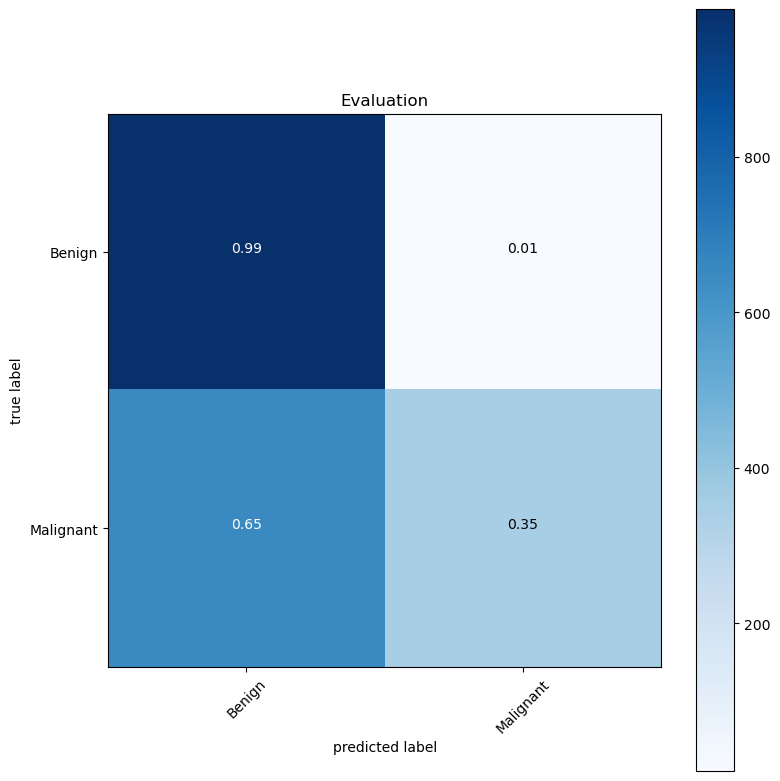

no normal ConfMatrix


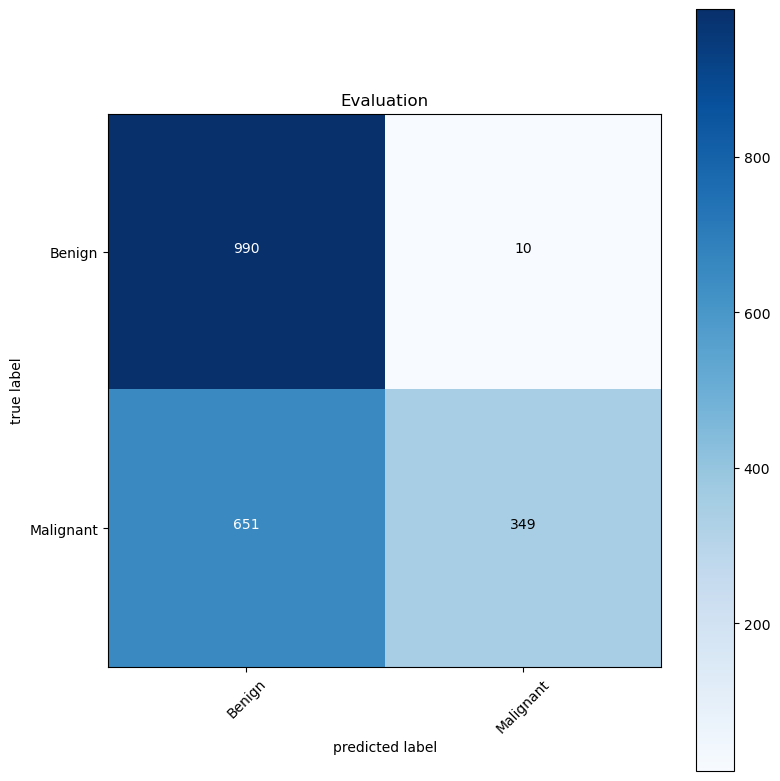

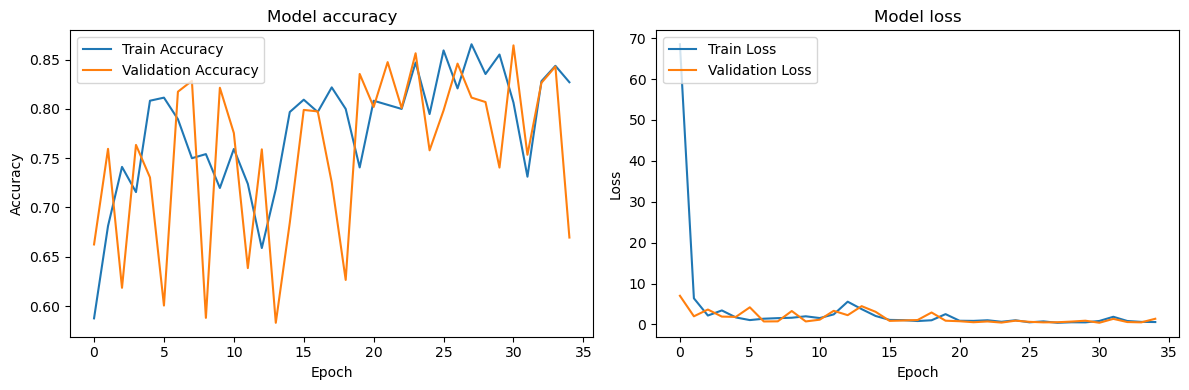

In [12]:
from keras.optimizers import Ftrl
model = CNN(layers=3, filters=32, filters_size=(2, 2), active_func='relu', opt=Adam(learning_rate=1e-4))
model = trainAndEval(model, epoch=35)